## Observations and Insights 

Observation 1:

The r-squared value of 0.903 (r= 0.95) that was calculated for the scatter plot between Weight Class and Average Tumor Volume suggests that there is a strong correlation between the two variables. Larger mice will tend to have larger tumors. This was, unsurprisingly supported by the r-squared value of 0.709 (r=0.84) for the scatter plot comparing Individual Mouse Weight and its Average Tumor Volume throughout testing. (Please read below if it is unclear why I have referred to two separate scatter plots.)

Observation 2:

Capomulin and Ramicane were the treatments which resulted in the lowest final tumor volume sizes. Of the two, Ramicane had the lower maximum, median, lower quartile and minimum. I would classify it as the most promising treatment based on this small study. I would be keen to see an analysis that looked and the CHANGE in tumor size for mice taking each drug. That to me would be just as telling a graph. I would also like to see a study with many more mice of varying weights.

Observation 3:

Mouse s185 saw a near linear reduction in tumor size whilst on Capomulin.
At Timepoint 0, the mouse had a tumor size of 45 mm cubed in volume.
By the conclusion of the testing that tumor was now only 23.34 mm cubed in volume.
That represents a 48.4% in volume.


## IMPORTANT: Please read.

The instructions relating to Scatter Plots and Regression Lines were, n my opinion, ambiguous.

They state:

"Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen."

Does this mean filter by Drug Regiment (= Capomulin) and then:

(a) Group by weight and then average the tumor volumes in each WEIGHT GROUP?

(b) Average EACH mouse's tumor volumes and plot it against its weight?

I did both and really hope not to be penalised for it.

As a side note, I don't see much value either approach. I am more interested in a scatter plotter comparing the weight of a mouse and either:

(a) Its tumor size at Timepoint 0.

(b) Its CHANGE in tumor size over the trial.


In [1]:
# Dependencies and Setup:

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files:

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results files.

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
# Print a snippet of the mouse data to become familiar with its layout and contents.

mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Print a snippet of the study results data to become familiar with its layout and contents.

study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset.

study_data_merged_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview.

study_data_merged_df.head(3)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1


In [5]:
# Determine the total number of columns and rows.

study_data_merged_df.shape


(1893, 8)

In [6]:
# Rename column headers with a consistent style to avoid conflicts in future code.

study_data_merged_df=study_data_merged_df.rename(columns={"Mouse ID": "Mouse_ID", "Drug Regimen": "Drug_Regimen", "Age_months": "Age_Months", "Weight (g)": "Weight_Grams", "Tumor Volume (mm3)": "Tumor_Vol_mm3", "Metastatic Sites": "Metastatic_Sites"})
study_data_merged_df.head(3)


,Mouse_ID,Drug_Regimen,Sex,Age_Months,Weight_Grams,Timepoint,Tumor_Vol_mm3,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1


In [7]:
# Check the number of different mice in the study.

number_mice=study_data_merged_df.Mouse_ID.nunique()
print(f"There are {number_mice} mice in the study.")


There are 249 mice in the study.


In [8]:
# Search for duplicate 'Mouse Id & Timepoint' combinations in the data.

duplicate_checklist =study_data_merged_df.duplicated(["Mouse_ID", "Timepoint"])


# Count the number of unique and duplicate combinations there are for 'Mouse ID & Timepoint' in the data.

count_duplicate_checklist=duplicate_checklist.value_counts()
count_duplicate_checklist


False    1888
True        5
dtype: int64

In [9]:
# Print the number of duplicate combinations of 'Mouse ID & Timepoint'.

Number_duplicates=count_duplicate_checklist.iloc[1]
Number_duplicates

print(f"There are {Number_duplicates} duplicate combinations of 'Mouse ID & Timepoint' in the data set.")


There are 5 duplicate combinations of 'Mouse ID & Timepoint' in the data set.


In [10]:
# Optional: Get all the duplicate rows based on 'Mouse ID & Timepoint' combination.

duplicate_rows_df=study_data_merged_df.loc[duplicate_checklist]
duplicate_rows_df

# These rows will soon be removed from the master data set, as will all other rows relating to Mouse IDs that appear on this list.


,Mouse_ID,Drug_Regimen,Sex,Age_Months,Weight_Grams,Timepoint,Tumor_Vol_mm3,Metastatic_Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
#Determine the number of duplicate mice.

number_mice=study_data_merged_df.Mouse_ID.nunique()
number_duplicate_mice=duplicate_rows_df.Mouse_ID.nunique()
print(f"Number of Duplicate Mouse IDs: {number_duplicate_mice}")


Number of Duplicate Mouse IDs: 1


In [12]:
# List the Mouse IDs that have duplicate 'Mouse ID & Timepoint' combinations in the data.

duplicate_IDs=duplicate_rows_df.Mouse_ID.unique()
duplicate_IDs_df=pd.DataFrame([{"duplicate_IDs": duplicate_IDs}])
duplicate_IDs


array(['g989'], dtype=object)

In [13]:
# Display all of the data associated with the Mouse ID(s) that caused duplicate 'Mouse ID & Timestamp' combinations.

Data_to_Delete=study_data_merged_df.loc[study_data_merged_df["Mouse_ID"].isin(duplicate_IDs), :]
Data_to_Delete

# Below is code which manually identifies data to be deleted, one Mouse ID at a time. It would be fine to use in this problem.
# The user would need to enter the Mouse_ID at the end of the code each time.
# In an experiment where multiple Mouse_Ids need to be deleted, using the code below would be time-consuming. 

# Matching_Rows=study_data_merged_df.loc[study_data_merged_df["Mouse_ID"]=="g989", :]
# Matching_Rows

,Mouse_ID,Drug_Regimen,Sex,Age_Months,Weight_Grams,Timepoint,Tumor_Vol_mm3,Metastatic_Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [14]:
# Determine the total number of rows that will need to be deleted from the study_data_merged_df data frame.

Data_to_Delete.shape


(13, 8)

In [15]:
# Clean the data frame by dropping ALL data relating to Mouse IDs where duplicate 'Mouse ID & Timepoint' combos were created.

Cleaned_df=study_data_merged_df.loc[~study_data_merged_df["Mouse_ID"].isin(duplicate_IDs), :]
Cleaned_df

# Below is code that one might use to manually remove undesirable Mouse-IDs from the dataframe.

# Data_to_Keep_df=study_data_merged_df.loc[study_data_merged_df["Mouse_ID"] != "g989", :]
# Data_to_Keep_df


,Mouse_ID,Drug_Regimen,Sex,Age_Months,Weight_Grams,Timepoint,Tumor_Vol_mm3,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
# Determine the total number of columns and rows of the newly cleaned data frame.

Cleaned_df.shape


(1880, 8)

In [17]:
# Checking the number of mice in the newly cleaned DataFrame.

number_mice_cleaned=Cleaned_df.Mouse_ID.nunique()
print(f"There are {number_mice_cleaned} mice in the experiment.")


There are 248 mice in the experiment.


## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Tumor_Volume_Mean=Cleaned_df.groupby(['Drug_Regimen'])['Tumor_Vol_mm3'].mean()
Tumor_Volume_Mean_df=pd.DataFrame({"Tumor_Volume_Mean":Tumor_Volume_Mean})

Tumor_Volume_Median=Cleaned_df.groupby(['Drug_Regimen'])['Tumor_Vol_mm3'].median()
Tumor_Volume_Median_df=pd.DataFrame({"Tumor_Volume_Median":Tumor_Volume_Median})

Tumor_Volume_Variance=Cleaned_df.groupby(['Drug_Regimen'])['Tumor_Vol_mm3'].var()
Tumor_Volume_Variance_df=pd.DataFrame({"Tumor_Volume_Variance":Tumor_Volume_Variance})

Tumor_Volume_StDev=Cleaned_df.groupby(['Drug_Regimen'])['Tumor_Vol_mm3'].std()
Tumor_Volume_StDev_df=pd.DataFrame({"Tumor_Volume_StDev":Tumor_Volume_StDev})

Tumor_Volume_SEM=Cleaned_df.groupby(['Drug_Regimen'])['Tumor_Vol_mm3'].sem()
Tumor_Volume_SEM_df=pd.DataFrame({"Tumor_Volume_SEM":Tumor_Volume_SEM})
Tumor_Volume_SEM_df

Tumor_Stats_By_Regimen1_df=pd.merge(Tumor_Volume_Mean_df, Tumor_Volume_Median_df, how="left", on=["Drug_Regimen"])
Tumor_Stats_By_Regimen2_df=pd.merge(Tumor_Stats_By_Regimen1_df, Tumor_Volume_Variance_df, how="left", on=["Drug_Regimen"])
Tumor_Stats_By_Regimen3_df=pd.merge(Tumor_Stats_By_Regimen2_df, Tumor_Volume_StDev_df, how="left", on=["Drug_Regimen"])
Tumor_Stats_By_Regimen4_df=pd.merge(Tumor_Stats_By_Regimen3_df, Tumor_Volume_SEM_df, how="left", on=["Drug_Regimen"])

Tumor_Stats_By_Regimen_Master_df=Tumor_Stats_By_Regimen4_df.rename(columns={"Tumor_Volume_Mean": "Tumor Volume Mean", "Tumor_Volume_Median": "Tumor Volume Median", "Tumor_Volume_Variance": "Tumor Volume Variance", "Tumor_Volume_StDev": "Tumor Volume StDev", "Tumor_Volume_SEM": "Tumor Volume SEM"}) 
Tumor_Stats_By_Regimen_Master_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume StDev,Tumor Volume SEM
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

Tumor_Volume_Summary_ByReg_df=Cleaned_df.groupby(['Drug_Regimen'])['Tumor_Vol_mm3'].agg(['mean', 'median', 'var', 'std', 'sem'])
Tumor_Volume_Summary_ByReg_df

,mean,median,var,std,sem
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Create a data frame with the number of timepoints counted per regimen.

Timepoint_Totals_ByReg=Cleaned_df.groupby(['Drug_Regimen'])['Timepoint'].count()
Timepoint_Totals_ByReg_df=pd.DataFrame({"Timepoint_Totals_ByReg": Timepoint_Totals_ByReg})
# Timepoint_Totals_ByReg_df.reset_index(inplace=True)
Timepoint_Totals_ByReg_df

,Timepoint_Totals_ByReg
Drug_Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


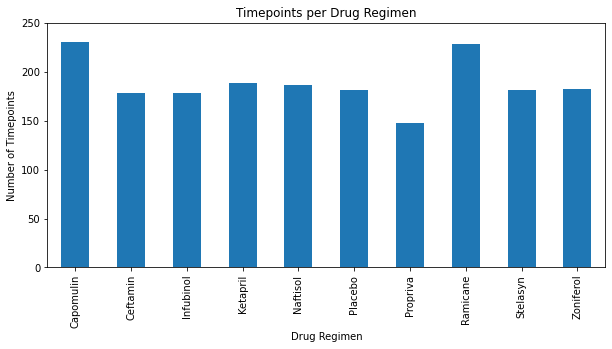

In [21]:
# Set up plot using pandas:

Timepoint_Totals_ByReg_df.plot(kind="bar", figsize=(10, 4.5), legend=False)

plt.title('Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.ylim(0, 250)

plt.show()


In [22]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Import potentially helpful dependencies.

import numpy as np

# Reset index to make Drug_Regimen a column in the data frame.

Timepoint_Totals_ByReg_df_Reset=Timepoint_Totals_ByReg_df.reset_index(inplace=True)


In [23]:
# Create list of regimens and set to x-axis.

RegimensToList=Timepoint_Totals_ByReg_df["Drug_Regimen"].tolist()
x_axis=np.arange(len(RegimensToList))
RegimensToList


['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [24]:
# Create list of counts per regimen.

SumTimepointsToList=Timepoint_Totals_ByReg_df["Timepoint_Totals_ByReg"].tolist()
SumTimepointsToList


[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

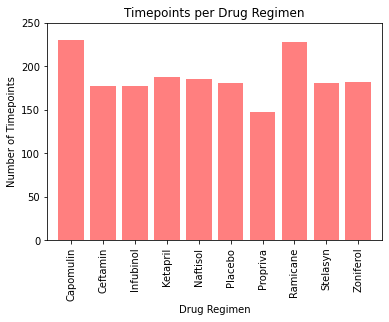

In [25]:
# Set up plot in pyplot:

plt.bar(x_axis, SumTimepointsToList, color='r', alpha=0.5, align="center")
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations, RegimensToList, rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(SumTimepointsToList)+20)

plt.title('Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')

plt.show()

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Create a data frame with the number of each sex.

Sex_Totals=Cleaned_df["Sex"].value_counts()
Sex_Totals_df=pd.DataFrame({"Sex_Totals":Sex_Totals})
Sex_Totals_df


,Sex_Totals
Male,958
Female,922


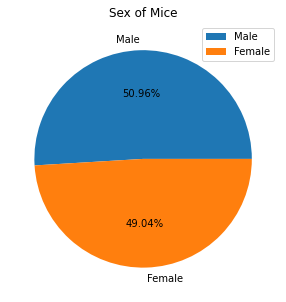

In [27]:
Sex_Totals_df.plot.pie(y='Sex_Totals', figsize=(5, 5), title="Sex of Mice", legend=True, ylabel="", autopct='%0.2f%%')

plt.show()

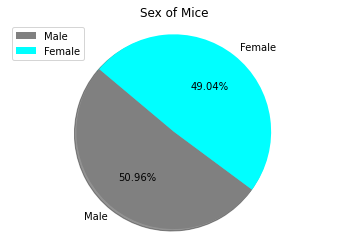

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot.

Sex_Totals=Cleaned_df["Sex"].value_counts()

labels=["Male", "Female"]
colors = ["grey","cyan"]
explode = (0,0)

plt.pie(Sex_Totals, explode=explode, labels=labels, colors=colors, shadow=True, startangle=140, autopct='%0.2f%%')

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.legend(loc="best")
plt.title("Sex of Mice")

plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

Mouse_Timepoint_Last=Cleaned_df.groupby(['Mouse_ID'])['Timepoint'].max()
Mouse_Timepoint_Last_df=pd.DataFrame({"Mouse_Timepoint_Last":Mouse_Timepoint_Last})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

Merged_Last_Timpoint_df=pd.merge(Mouse_Timepoint_Last_df, Cleaned_df, how="left", on=["Mouse_ID"])

Only_Last_df=Merged_Last_Timpoint_df.loc[Merged_Last_Timpoint_df["Timepoint"] == Merged_Last_Timpoint_df["Mouse_Timepoint_Last"], ["Mouse_ID", "Tumor_Vol_mm3", "Drug_Regimen", "Mouse_Timepoint_Last"]]
Only_Last_df.head()

,Mouse_ID,Tumor_Vol_mm3,Drug_Regimen,Mouse_Timepoint_Last
9,a203,67.973419,Infubinol,45
19,a251,65.525743,Infubinol,45
29,a262,70.717621,Placebo,45
39,a275,62.999356,Ceftamin,45
46,a366,63.440686,Stelasyn,30


In [30]:
# Put treatments into a list for the upcoming for loop. (And later for plot labels.)

Treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting).

# Locate the rows which contain mice on each drug and get the tumor volumes.

List={}
 
for treatment in Treatments:
    for index, row in Only_Last_df.iterrows():
        if row["Drug_Regimen"] == treatment:
            List.setdefault(treatment, []).append(row["Tumor_Vol_mm3"])
Final_Vols_Each_Treatment_df= pd.DataFrame(List)
Final_Vols_Each_Treatment_df.head()
    

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078


In [31]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in Treatments:
    
    temporary=Final_Vols_Each_Treatment_df.loc[:, treatment]
    Quartiles = temporary.quantile([.25,.50,.75])
    Ql = Quartiles[.25]
    Qu = Quartiles[.75]
    IQR = Qu - Ql
    Outliers_Lower_Bound = Ql - (1.5*IQR)
    Outliers_Upper_Bound = Qu + (1.5*IQR)
     
    print(f"Drug Regimen - {treatment}:")
    print(f"---------------------------------------------------")
    print(f"The lower quartile of Tumor Volume is {Ql} mm3.")
    print(f"The upper quartile of Tumor Volume is {Qu} mm3.")
    print(f"The Interquartile range of Tumor Volume is {IQR} mm3.")
    print(f"Outliers will occur outside the range [{Outliers_Lower_Bound}, {Outliers_Upper_Bound}]")
    print(f"---------------------------------------------------")
   

Drug Regimen - Capomulin:
---------------------------------------------------
The lower quartile of Tumor Volume is 32.37735684 mm3.
The upper quartile of Tumor Volume is 40.1592203 mm3.
The Interquartile range of Tumor Volume is 7.781863460000004 mm3.
Outliers will occur outside the range [20.70456164999999, 51.83201549]
---------------------------------------------------
Drug Regimen - Ramicane:
---------------------------------------------------
The lower quartile of Tumor Volume is 31.56046955 mm3.
The upper quartile of Tumor Volume is 40.65900627 mm3.
The Interquartile range of Tumor Volume is 9.098536719999998 mm3.
Outliers will occur outside the range [17.912664470000003, 54.30681135]
---------------------------------------------------
Drug Regimen - Infubinol:
---------------------------------------------------
The lower quartile of Tumor Volume is 54.04860769 mm3.
The upper quartile of Tumor Volume is 65.52574285 mm3.
The Interquartile range of Tumor Volume is 11.4771351600000

In [32]:
# Determine outliers for Capomulin using upper and lower bounds.

Capomulin_Final_Volume=Final_Vols_Each_Treatment_df["Capomulin"]
Capomulin_Final_Volume_df=pd.DataFrame({"Capomulin_Final_Volume": Capomulin_Final_Volume})
OL_Cap_df=Capomulin_Final_Volume_df.loc[(Capomulin_Final_Volume_df["Capomulin_Final_Volume"]>51.83201549) | (Capomulin_Final_Volume_df["Capomulin_Final_Volume"]<20.70456164999999), :]
OL_Cap_renamed=OL_Cap_df.rename(columns={"Capomulin_Final_Volume": "Complete List of Capomulin Outliers"})
OL_Cap_renamed

,Complete List of Capomulin Outliers


In [33]:
# Determine outliers for Capomulin using upper and lower bounds.

Ramicane_Final_Volume=Final_Vols_Each_Treatment_df["Ramicane"]
Ramicane_Final_Volume_df=pd.DataFrame({"Ramicane_Final_Volume": Ramicane_Final_Volume})
OL_Ram_df=Ramicane_Final_Volume_df.loc[(Ramicane_Final_Volume_df["Ramicane_Final_Volume"]>54.30681135) | (Ramicane_Final_Volume_df["Ramicane_Final_Volume"]<17.912664470000003), :]
OL_Ram_renamed=OL_Ram_df.rename(columns={"Ramicane_Final_Volume": "Complete List of Ramicane Outliers"})
OL_Ram_renamed

,Complete List of Ramicane Outliers


In [34]:
# Determine outliers for Capomulin using upper and lower bounds.

Infubinol_Final_Volume=Final_Vols_Each_Treatment_df["Infubinol"]
Infubinol_Final_Volume_df=pd.DataFrame({"Infubinol_Final_Volume": Infubinol_Final_Volume})
OL_Inf_df=Infubinol_Final_Volume_df.loc[(Infubinol_Final_Volume_df["Infubinol_Final_Volume"]>82.74144559000001) | (Infubinol_Final_Volume_df["Infubinol_Final_Volume"]<36.83290494999999), :]
OL_Inf_df_renamed=OL_Inf_df.rename(columns={"Infubinol_Final_Volume": "Complete List of Infubinol Outliers"})
OL_Inf_df_renamed

,Complete List of Infubinol Outliers
5,36.321346


In [35]:
# Determine outliers for Capomulin using upper and lower bounds.

Ceftamin_Final_Volume=Final_Vols_Each_Treatment_df["Ceftamin"]
Ceftamin_Final_Volume_df=pd.DataFrame({"Ceftamin_Final_Volume": Ceftamin_Final_Volume})
OL_Cef_df=Ceftamin_Final_Volume_df.loc[(Ceftamin_Final_Volume_df["Ceftamin_Final_Volume"]>87.66645829999999) | (Ceftamin_Final_Volume_df["Ceftamin_Final_Volume"]<25.355449580000002), :]
OL_Cef_df_renamed=OL_Cef_df.rename(columns={"Ceftamin_Final_Volume": "Complete List of Ceftamin Outliers"})
OL_Cef_df_renamed


,Complete List of Ceftamin Outliers


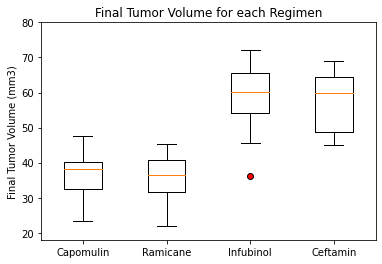

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

red_square = dict(markerfacecolor='r', marker='o')
plt.boxplot([Capomulin_Final_Volume, Ramicane_Final_Volume, Infubinol_Final_Volume, Ceftamin_Final_Volume], labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], flierprops=red_square);
plt.title("Final Tumor Volume for each Regimen")
plt.ylabel('Final Tumor Volume (mm3)')
plt.ylim(18, 80)

plt.show()


## Line and Scatter Plots

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Create a data frame that contains Capomulin data only.

Capomulin_Only_df=Cleaned_df.loc[Cleaned_df["Drug_Regimen"]=="Capomulin", :]
Capomulin_Only_df.head()


,Mouse_ID,Drug_Regimen,Sex,Age_Months,Weight_Grams,Timepoint,Tumor_Vol_mm3,Metastatic_Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [38]:
#Select a mouse ID: s185

# Trim the data frame further so that it only contains the relevent data for that particular mouse.

s185_Only_df=Capomulin_Only_df.loc[Capomulin_Only_df["Mouse_ID"]=="s185", ["Timepoint","Tumor_Vol_mm3"]]
s185_Only_df


,Timepoint,Tumor_Vol_mm3
10,0,45.000000
11,5,43.878496
12,10,37.614948
13,15,38.177232
14,20,36.866876
15,25,33.949940
16,30,32.959671
17,35,28.328531
18,40,25.472143
19,45,23.343598


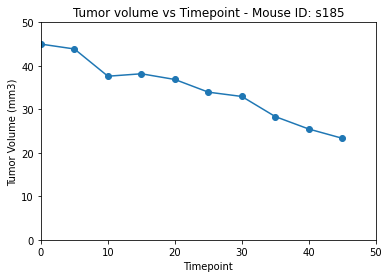

In [39]:
# Store the timepoint values as a variable.

timepoint=s185_Only_df["Timepoint"]
timepoint

# Store the volume values as a variable.

volume=s185_Only_df["Tumor_Vol_mm3"]
volume

# Create the line graph.

plt.plot(timepoint, volume, marker="o")
plt.title("Tumor volume vs Timepoint - Mouse ID: s185")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(0, 50)
plt.ylim(0, 50)

plt.show()


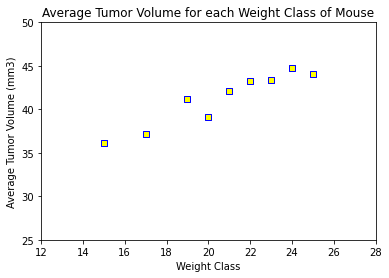

In [40]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Capomulin_By_Weight=Capomulin_Only_df.groupby(['Weight_Grams'])['Tumor_Vol_mm3'].mean()
Capomulin_By_Weight_df=pd.DataFrame({"Capomulin_By_Weight":Capomulin_By_Weight})
Capomulin_By_Weight_df=Capomulin_By_Weight_df.rename(columns={"Capomulin_By_Weight": "Average Tumour Volume"})
Capomulin_By_Weight_df.reset_index(inplace=True)

# Store the average volume per weight class as a variable.

Ave_Vol_Per_Weight=Capomulin_By_Weight_df["Average Tumour Volume"].tolist()


# Store the weight classes as a variable.

Weight_List=Capomulin_By_Weight_df["Weight_Grams"].tolist()


# Create the Scatter Plot.

plt.scatter(Weight_List, Ave_Vol_Per_Weight, marker="s", facecolors="yellow", edgecolors="blue")
plt.title("Average Tumor Volume for each Weight Class of Mouse")
plt.xlabel('Weight Class')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlim(12, 28)
plt.ylim(25, 50)

plt.show()

## Correlation and Regression

In [41]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Import potentially useful Dependencies.

from scipy.stats import linregress
from sklearn import datasets


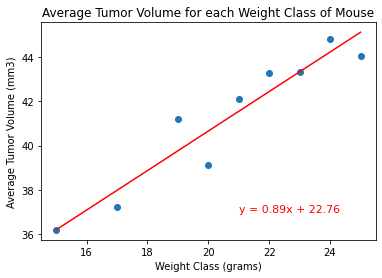

For Linear Regression Line:
(y is the Average Tumor Volume and x is the Weight Class of Mouse.)


In [42]:
# Establish a linear regression model.

x_values = Capomulin_By_Weight_df["Weight_Grams"]
y_values = Capomulin_By_Weight_df["Average Tumour Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(21,37),fontsize=11,color="red")
plt.title("Average Tumor Volume for each Weight Class of Mouse")
plt.xlabel('Weight Class (grams)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
print("For Linear Regression Line:")
print("(y is the Average Tumor Volume and x is the Weight Class of Mouse.)")

The r-squared is: 0.9034966277438602


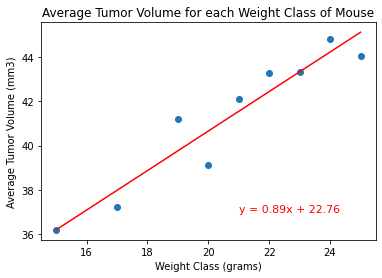

For Linear Regression Line:
(y is the Average Tumor Volume and x is the Weight Class of Mouse.)


In [43]:
# Establish the correlation coefficient.

x_values = Capomulin_By_Weight_df["Weight_Grams"]
y_values = Capomulin_By_Weight_df["Average Tumour Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(21,37),fontsize=11,color="red")
plt.title("Average Tumor Volume for each Weight Class of Mouse")
plt.xlabel('Weight Class (grams)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
print("For Linear Regression Line:")
print("(y is the Average Tumor Volume and x is the Weight Class of Mouse.)")

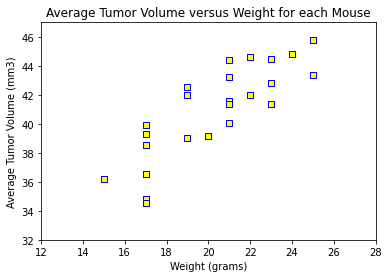

In [44]:
# Generate a scatter plot of tumor volume vs. mouse weight for the Capomulin regimen

Cupomulin_Grouped_Mouse=Capomulin_Only_df.groupby(["Mouse_ID"]).mean()

#print(Cupomulin_Grouped_Mouse)

x_values = Cupomulin_Grouped_Mouse['Weight_Grams']
y_values = Cupomulin_Grouped_Mouse["Tumor_Vol_mm3"]

#Create a Scatter Plot.

plt.scatter(x_values, y_values, marker="s", facecolors="yellow", edgecolors="blue")
plt.title("Average Tumor Volume versus Weight for each Mouse")
plt.xlabel('Weight (grams)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlim(12, 28)
plt.ylim(32, 47)

plt.show()

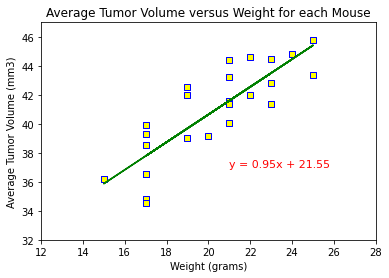

For Linear Regression Line:
(y is the Average Tumor Volume and x is the Weight Class of Mouse.)


In [45]:
# Establish a linear regression model.

x_values = Cupomulin_Grouped_Mouse['Weight_Grams']
y_values = Cupomulin_Grouped_Mouse["Tumor_Vol_mm3"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="s", facecolors="yellow", edgecolors="blue")
plt.plot(x_values, regress_values,"g-")
plt.annotate(line_eq,(21,37),fontsize=11,color="red")

plt.title("Average Tumor Volume versus Weight for each Mouse")
plt.xlabel('Weight (grams)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlim(12, 28)
plt.ylim(32, 47)

plt.show()
print("For Linear Regression Line:")
print("(y is the Average Tumor Volume and x is the Weight Class of Mouse.)")

The r-squared is: 0.7088568047708723


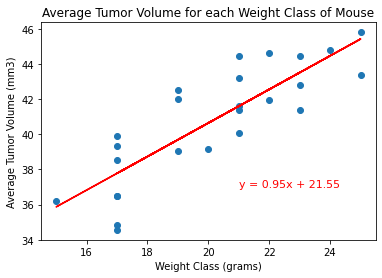

For Linear Regression Line:
(y is the Average Tumor Volume and x is the Weight Class of Mouse.)


In [46]:
# Establish the correlation coefficient.

x_values = Cupomulin_Grouped_Mouse['Weight_Grams']
y_values = Cupomulin_Grouped_Mouse["Tumor_Vol_mm3"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(21,37),fontsize=11,color="red")
plt.title("Average Tumor Volume for each Weight Class of Mouse")
plt.xlabel('Weight Class (grams)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
print("For Linear Regression Line:")
print("(y is the Average Tumor Volume and x is the Weight Class of Mouse.)")